# kNN

Is one of the most used tool, widely supported and full of libraries. It makes no conjecture about the fields of the data or how they should be cartegorized, is context agnostic.

As often happens in AI, practice is far ahead compared to theory:
- No scieintific or proof of works.
- Just empirical evidence


In this notebook we will implement KNN step by step, and skip the definition of K for lack of time.

![kNN mechanics](images/knn1.png)

kNN does not assume anything about the data, other than a distance measure can be calculated consistently between any two instances. As such, it is called non-parametric or non-linear as it does not assume a functional form.

## instance-based 

Instance-based algorithms are those algorithms that model the problem using data instances (or rows) in order to make predictive decisions. The kNN algorithm is an extreme form of instance-based methods because all training observations are retained as part of the model.


## competitive learning

It is a competitive learning algorithm, because it internally uses competition between model elements (data instances) in order to make a predictive decision. The objective similarity measure between data instances causes each data instance to compete to “win” or be most similar to a given unseen data instance and contribute to a prediction.


## lazy learning algorithms

Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

## kNN Algorithm

The kNN task can be broken down into writing 3 primary functions: 

    1. Calculate the distance between any two points 
    2. Find the nearest neighbours based on these pairwise distances
    3. Majority vote on a class labels based on the nearest neighbour list 

![kNN Alogorithm](images/knn2.jpg)

## When to use it

- Your data is numeric. It doesn't work with categorical features. We're computing the distance between real numbers!
- If you don't have labels for your data
- K-means is the simplest. To implement and to run. All you need to do is choose "k" and run it a number of times.
- K-means and other clustering algorithms shine when you have multivariate data. They will "work" with 1-dimensional data, but they are not very smart anymore.
- useful when you have an idea of how many clusters actually exists in your space.


## Data preparation

This should always be the first step when tackling a Machine Learning problem. We must clean, sanitize and organize the data.
In this problem we will skip this part, as usually does not require any domain specific knowledge, but just a lot of patience

Once the data clean we can split to get ready for the three phases
- Train 60%
- Test 20%
- Validate 20%

this can be a good ratio to split your data, also 80, 10, 10 will work fine. Do not underestimate the importance of test and validation set, as they are key points to avoid overfitting and to check the accuracy of your models.

In our case we will need only Train and Test set, as we are working on a simplified problem.

![data preparation](images/knn3.jpg)

In [18]:
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation

In [20]:
#load textfile dataset (2D data points)
# for each user, how many packets are sent per second and what's the size of a packet
#anomalies (DDOS attempts) will have lots of big packets sent in a short amount of time 
def load_dataset(name):
    return np.loadtxt(name)

In [19]:
#euclidian distance between 2 data points. For as many data points as necessary. 
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [57]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    #set the dataset
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        #for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
            
        tmp_prototypes = np.zeros((k, num_features))
        
        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.mean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes_old = prototypes
        prototypes = tmp_prototypes
        
        #add our calculated centroids to our history for plotting
        history_centroids.append(tmp_prototypes)
        print(iteration, norm)

    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to

In [58]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [76]:
#main file 
def execute():
    #load dataset
    dataset = load_dataset('durudataset.txt')
    #train the model on the data
    centroids, history_centroids, belongs_to = kmeans(2, 0.1)
    #plot the results
    plot(dataset, history_centroids, belongs_to)
    
    return dataset, centroids, history_centroids, belongs_to


1 3.38926956127
2 1.52454387552
3 0.395697656636
4 0.0


<IPython.core.display.Javascript object>


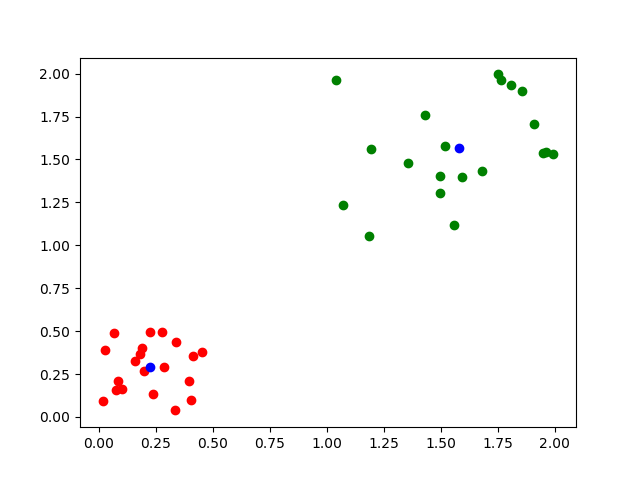

centroids 1 [ 0.45173565  0.57047826]
centroids 1 [ 1.73805256  1.59565262]
centroids 2 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]


In [77]:
%matplotlib notebook

#do everything
dataset, centroids, history_centroids, belongs_to = execute()

<IPython.core.display.Javascript object>


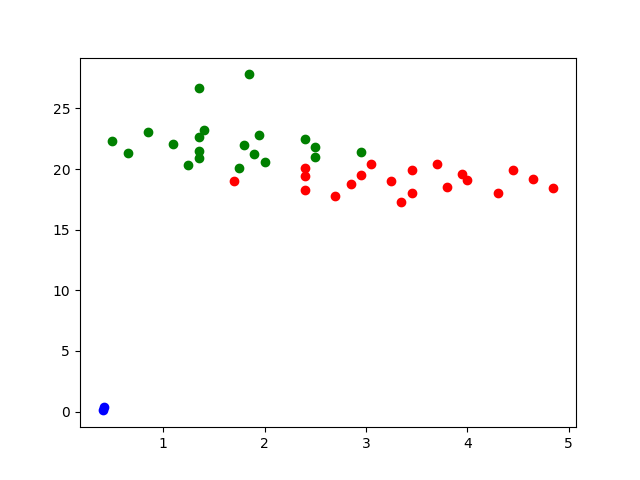

<IPython.core.display.Javascript object>


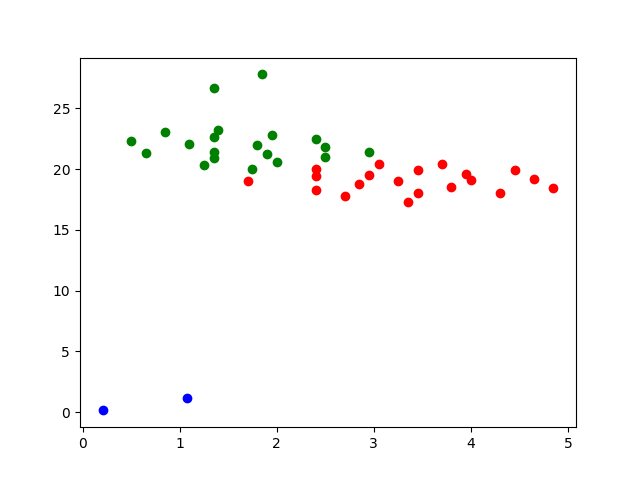

<IPython.core.display.Javascript object>


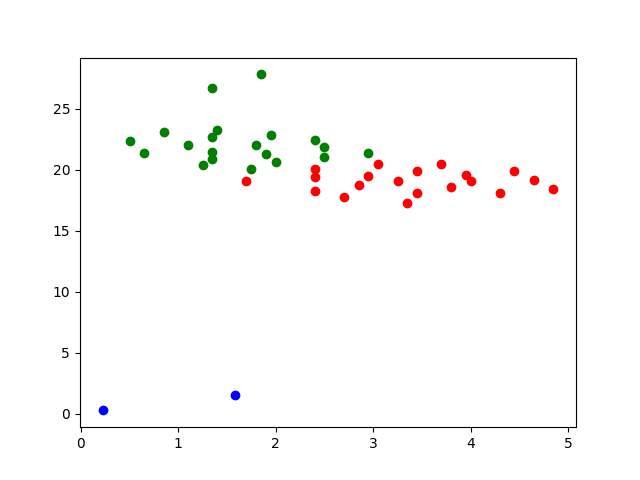

<IPython.core.display.Javascript object>


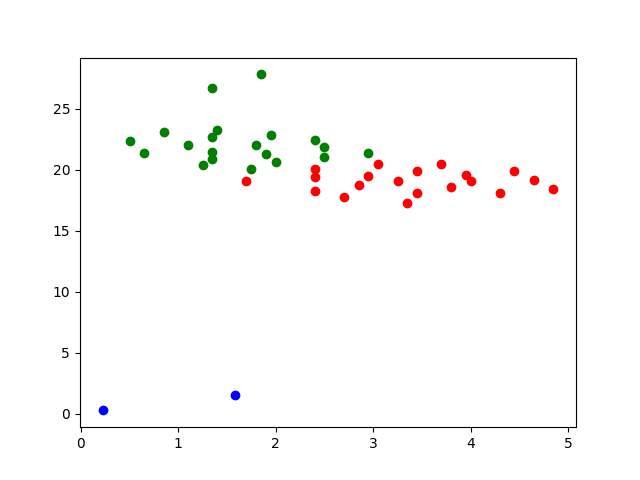

<IPython.core.display.Javascript object>


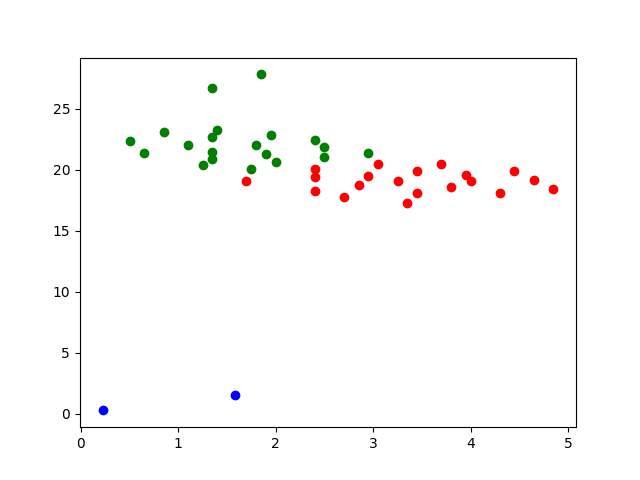

In [73]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)
for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)